In [1]:
import umap.aligned_umap
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-09-27 17:13:15.279572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 17:13:15.845028: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-09-27 17:13:15.845080: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinf

In [2]:
path1 = "/home/yifan/dataset/clean/pairflip/cifar10/0"
path2 = "/home/yifan/Exp/Dropout/0.3/experiment1"

In [3]:
def getData(path,epoch):
    ##### get representation
    X_train = np.load(os.path.join(path,"Model","Epoch_{}".format(epoch),"train_data.npy"))
    X_test = np.load(os.path.join(path,"Model","Epoch_{}".format(epoch),"test_data.npy"))
    
    #### get label
    training_label_loc =  os.path.join(path, "Training_data", "training_dataset_label.pth")
    y_train = torch.load(training_label_loc, map_location="cpu")
    y_train = y_train.numpy()
    testing_label_loc =  os.path.join(path, "Testing_data", "testing_dataset_label.pth") 
    y_test = torch.load(testing_label_loc, map_location="cpu")
    y_test = y_test.numpy()

    return X_train, X_test, y_train, y_test


In [39]:
X_train1, X_test1, y_train1, y_test1 = getData(path1,150)
X_train2, X_test2, y_train2, y_test2 = getData(path2,150)

In [40]:
np.random.seed(23423)
nA = 3000
nRest = 11400

# create SETA and SETS for representation1
rand_perm1 = np.random.permutation(len(X_train1))
SETA1 = X_train1[rand_perm1[:nA]]
SETS1 = [X_train1[rand_perm1[nA+nRest*i:nA+nRest*(i+1)]] for i in range(5)]

# create SETA and SETS for representation2
rand_perm2 = np.random.permutation(len(X_train2))
SETA2 = X_train2[rand_perm2[:nA]]
SETS2 = [X_train2[rand_perm2[nA+nRest*i:nA+nRest*(i+1)]] for i in range(5)]


In [47]:
X_train = X_train2.reshape(X_train2.shape[0],X_train2.shape[1])
y_train= y_train2

In [83]:

#set_up_parameters

epochs = 200
n_neighbors= 30
n_components = 2
MIN_DIST = 0.1
neg_sample_rate = 5
n = X_train.shape[0]
    


%load_ext autoreload
%autoreload 2

np.random.seed(23423)

rand_perm = np.random.permutation(n)

X_train_rp = X_train
y_train_rp = y_train
print(X_train_rp.shape)

X_train200, _, y_train200, _ = getData(path1,200)
X_train150, _, y_train150, _ = getData(path1,150)
X_train100, _, y_train100, _ = getData(path1,100)
X_train50, _, y_train50, _ = getData(path1,50)
X_train1, _, y_train1, _ = getData(path1,1)
X_train50 = X_train50.reshape(X_train50.shape[0],X_train50.shape[1] )
X_train1 = X_train1.reshape(X_train1.shape[0],X_train1.shape[1] )




nA = 3000
nRest = 11400

X_train_rp = X_train200[:(nA +nRest )] 
y_train_rp = y_train200[:(nA +nRest )] 


X_train_rp = np.concatenate((X_train_rp, X_train150[(len(X_train_rp) -1) : (len(X_train_rp)+ nRest-1)]),axis=0)
y_train_rp = np.concatenate((y_train_rp, y_train150[(len(y_train_rp) -1) : (len(y_train_rp)+ nRest-1)]),axis=0)
print(X_train_rp.shape)

X_train_rp = np.concatenate((X_train_rp, X_train100[(len(X_train_rp) -1) : (len(X_train_rp)+ nRest-1)]),axis=0)
y_train_rp = np.concatenate((y_train_rp, y_train100[(len(y_train_rp) -1) : (len(y_train_rp)+ nRest-1)]),axis=0)
print(X_train_rp.shape)

X_train_rp = np.concatenate((X_train_rp, X_train50[(len(X_train_rp) -1) : (len(X_train_rp)+ nRest-1)]),axis=0)
y_train_rp = np.concatenate((y_train_rp, y_train50[(len(y_train_rp) -1) : (len(y_train_rp)+ nRest-1)]),axis=0)
print(X_train_rp.shape)

X_train_rp = np.concatenate((X_train_rp, X_train1[(len(X_train_rp) -1) : (len(X_train)-1)]),axis=0)
y_train_rp = np.concatenate((y_train_rp, y_train1[(len(y_train_rp) -1) : (len(y_train_rp)-1)]),axis=0)
print(X_train_rp.shape)



SETA = X_train_rp[:nA]
y_SETA = y_train_rp[:nA]

SETS = []
y_SETS = []
DATA = []

N_DATA = []

for i in range(5):
    pass
    print('in loop')
    
    setb = X_train_rp[nA+nRest*i:nA+nRest*(i+1)]
    y_setb = y_train_rp[nA+nRest*i:nA+nRest*(i+1)]
    data = np.concatenate((SETA,setb))
    N_DATA.append(data.shape[0])
    
    SETS.append(setb)
    y_SETS.append(y_setb)
    DATA.append(data)

    
print('out of loop')    

SETS = np.array(SETS)
DATA = np.array(DATA)
N_DATA = np.array(N_DATA)

n_SET = SETS.shape[0]

print(SETA.shape, SETS.shape, SETS[0].shape, DATA.shape, n_SET)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(50000, 512)
(25800, 512)
(37200, 512)
(48600, 512)
(50000, 512)
in loop
in loop
in loop
in loop
in loop
out of loop
(3000, 512) (5,) (11400, 512) (5,) 5


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:84: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [84]:
from MANE import *

GRAPHS = []
ROWS = []
COLUMNS = []
WEIGHTS = []
EPOCHS_PER_SAMPLE = []
EPOCH_OF_NEXT_SAMPLE = []
EPOCHS_PER_NEGATIVE_SAMPLE = []
EPOCH_OF_NEXT_NEGATIVE_SAMPLE = []

SET_IDX = []
K_IDX = []

for iset in range(n_SET):
    graph = get_prob_matrix(DATA[iset],n_neighbors=n_neighbors)
    graph.data[graph.data < (graph.data.max() / float(epochs))] = 0.0
    graph.eliminate_zeros()
    
    epochs_per_sample = make_epochs_per_sample(graph.data, epochs)
    epoch_of_next_sample = epochs_per_sample.copy()
    epochs_per_negative_sample = epochs_per_sample / neg_sample_rate
    epoch_of_next_negative_sample = epochs_per_negative_sample.copy()
    
    set_idx = iset*np.ones(len(epochs_per_sample),dtype=np.int)
    k_idx = np.arange(epochs_per_sample.shape[0],dtype=np.int)
    
    SET_IDX.append(set_idx)
    K_IDX.append(k_idx)
    
    ROWS.append(graph.row)
    COLUMNS.append(graph.col)
    EPOCHS_PER_SAMPLE.append(epochs_per_sample)
    EPOCH_OF_NEXT_SAMPLE.append(epoch_of_next_sample)
    EPOCHS_PER_NEGATIVE_SAMPLE.append(epochs_per_negative_sample)
    EPOCH_OF_NEXT_NEGATIVE_SAMPLE.append(epoch_of_next_negative_sample)
    
    print(epochs_per_sample.shape)
print(SET_IDX)



SET_IDX = np.array(np.concatenate(SET_IDX)).reshape(-1)
K_IDX = np.array(np.concatenate(K_IDX)).reshape(-1)

n_idx = np.random.permutation(len(SET_IDX))
SET_IDX = SET_IDX[n_idx]
K_IDX = K_IDX[n_idx]

print('done')

Processed  1000  of  14400  samples.
Processed  2000  of  14400  samples.
Processed  3000  of  14400  samples.
Processed  4000  of  14400  samples.
Processed  5000  of  14400  samples.
Processed  6000  of  14400  samples.
Processed  7000  of  14400  samples.
Processed  8000  of  14400  samples.
Processed  9000  of  14400  samples.
Processed  10000  of  14400  samples.
Processed  11000  of  14400  samples.
Processed  12000  of  14400  samples.
Processed  13000  of  14400  samples.
Processed  14000  of  14400  samples.


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

(657906,)
Processed  1000  of  14400  samples.
Processed  2000  of  14400  samples.
Processed  3000  of  14400  samples.
Processed  4000  of  14400  samples.
Processed  5000  of  14400  samples.
Processed  6000  of  14400  samples.
Processed  7000  of  14400  samples.
Processed  8000  of  14400  samples.
Processed  9000  of  14400  samples.
Processed  10000  of  14400  samples.
Processed  11000  of  14400  samples.
Processed  12000  of  14400  samples.
Processed  13000  of  14400  samples.
Processed  14000  of  14400  samples.
(656740,)
Processed  1000  of  14400  samples.
Processed  2000  of  14400  samples.
Processed  3000  of  14400  samples.
Processed  4000  of  14400  samples.
Processed  5000  of  14400  samples.
Processed  6000  of  14400  samples.
Processed  7000  of  14400  samples.
Processed  8000  of  14400  samples.
Processed  9000  of  14400  samples.
Processed  10000  of  14400  samples.
Processed  11000  of  14400  samples.
Processed  12000  of  14400  samples.
Processed 

Hyperparameters a = 1.5769434604035877 and b = 0.8950608780665811


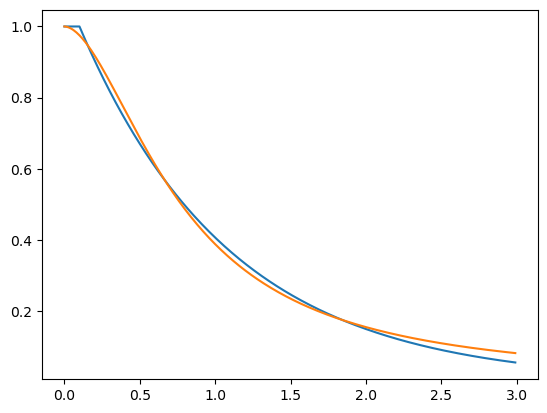

In [85]:
from scipy import optimize
x = np.linspace(0, 3, 300)

y = (x>MIN_DIST) * np.exp(-x+MIN_DIST)
y[x<=MIN_DIST] = 1.0

function = lambda x, a, b: 1 / (1 + a*x**(2*b))

p , _ = optimize.curve_fit(function, x, y) 

a = p[0]
b = p[1] 
print("Hyperparameters a = " + str(a) + " and b = " + str(b))

x_p = np.arange(0,3,0.01)
y_p = np.exp(- (x_p-MIN_DIST) * ( (x_p - MIN_DIST) >=0 ) )
y_p2 = 1 / (1 + a*x_p**(2*b))

plt.figure()
plt.plot(x_p,y_p, label='Target')
plt.plot(x_p,y_p2, label='Fitted')
plt.show()

In [86]:
SETA.shape

(3000, 512)

In [87]:
from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components = n_components)
init = pca.fit_transform(SETA)
embA = init.astype(np.float32).copy()
expansion = 10.0 / np.abs(embA).max()
embA = (embA * expansion).astype(np.float32)

emb_sets = []

print('before initi')

for i in range(n_SET):
    data = DATA[i]
    emb_i = pca.transform(data[nA:])
    emb_i = (emb_i * expansion).astype(np.float32)
    
    emb_sets.append(emb_i)
    
print('after init')

repulsion_strength=1.0

init_lr = 1.0

#SET_IDX
#K_IDX

print(len(EPOCH_OF_NEXT_NEGATIVE_SAMPLE))
print(EPOCH_OF_NEXT_NEGATIVE_SAMPLE[0].shape)

import timeit

for epoch in range(epochs):
    pass
    
    if epoch%20==0:
        print('epoch ', epoch, 'of ', epochs)
    #print('epoch ', epoch, 'of ', epochs)
    start = timeit.default_timer()
    
    lr = init_lr * (1.0 - float(epoch)/float(epochs))
    
    #'''
    one_epoch_nsets(emCommon=embA, embS=emb_sets,
                     rows=ROWS, columns=COLUMNS,
                     nCommon=nA, n_points_=N_DATA,
                     Set=SET_IDX, K_idx=K_IDX,
                     a=a, b=b, dim=n_components,
                     lr=lr, epoch=epoch,
                     epochs_per_sample=EPOCHS_PER_SAMPLE,
                     epoch_of_next_sample=EPOCH_OF_NEXT_SAMPLE,
                     epochs_per_negative_sample=EPOCHS_PER_NEGATIVE_SAMPLE,
                     epoch_of_next_negative_sample=EPOCH_OF_NEXT_NEGATIVE_SAMPLE,
                     repulsion_strength=repulsion_strength)
    #'''
    stop = timeit.default_timer()
    print('Time for epoch ', epoch, ': ', stop - start) 

before initi
after init
5
(657906,)
epoch  0 of  200
Time for epoch  0 :  0.17692028917372227
Time for epoch  1 :  0.16867035813629627
Time for epoch  2 :  0.18333107233047485
Time for epoch  3 :  0.19196446798741817
Time for epoch  4 :  0.21035857498645782
Time for epoch  5 :  0.21497554332017899
Time for epoch  6 :  0.22912627272307873
Time for epoch  7 :  0.23196076788008213
Time for epoch  8 :  0.24933543987572193
Time for epoch  9 :  0.2528753560036421
Time for epoch  10 :  0.25459243543446064
Time for epoch  11 :  0.25673569180071354
Time for epoch  12 :  0.26240259781479836
Time for epoch  13 :  0.2604279313236475
Time for epoch  14 :  0.2685952577739954
Time for epoch  15 :  0.26458001881837845
Time for epoch  16 :  0.2625897694379091
Time for epoch  17 :  0.2618649732321501
Time for epoch  18 :  0.26149083860218525
Time for epoch  19 :  0.2618297878652811
epoch  20 of  200
Time for epoch  20 :  0.26662800274789333
Time for epoch  21 :  0.26335927471518517
Time for epoch  22 : 

(3000, 2)


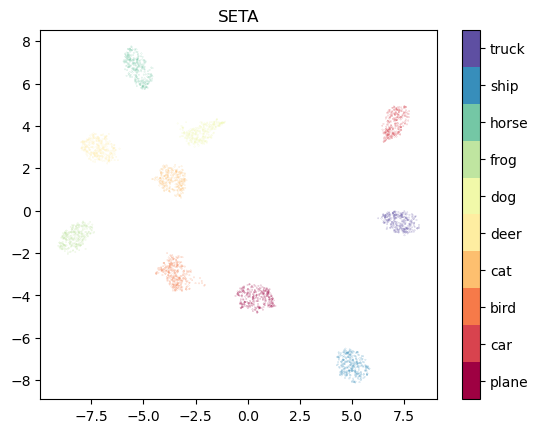

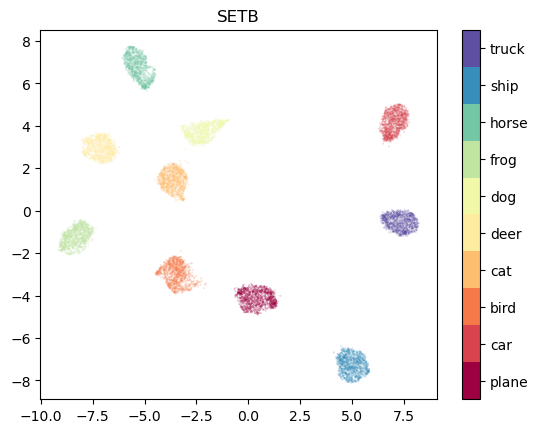

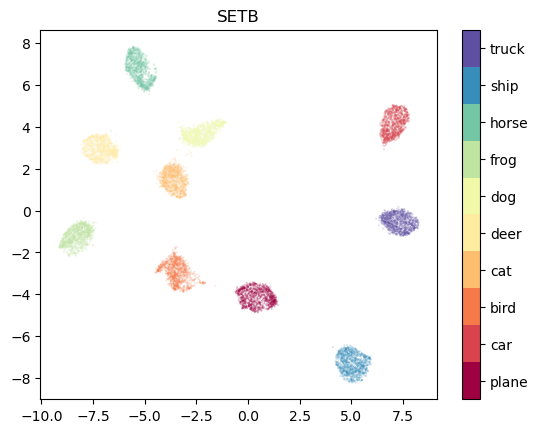

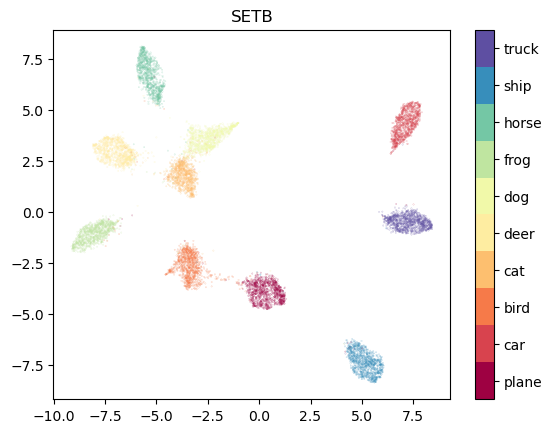

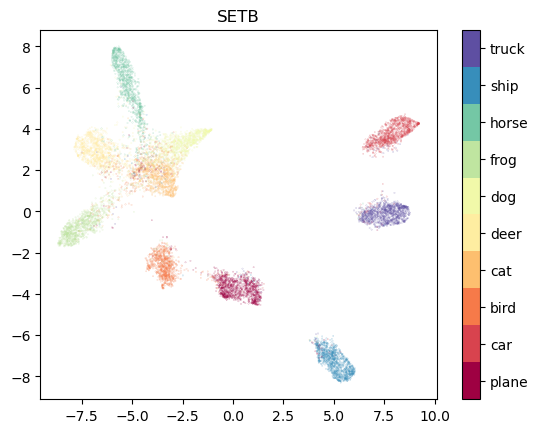

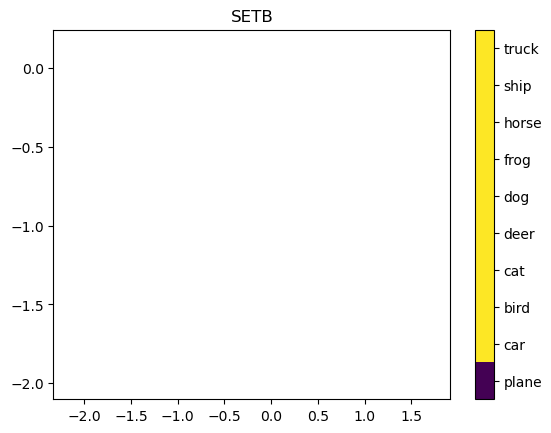

In [88]:
%matplotlib inline


classes= ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure()
plt.title('SETA')
print(embA.shape)
plt.scatter(embA[:,0], embA[:,1], c=y_SETA, s=0.01, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

for i in range(n_SET):

    plt.figure()
    plt.title('SETB')
    embB = emb_sets[i]
    y_embB = y_SETS[i]
    plt.scatter(embB[:,0], embB[:,1], c=y_embB, s=0.01, cmap='Spectral')
    cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
    cbar.set_ticks(np.arange(10))
    cbar.set_ticklabels(classes)
